In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
url1 = "https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt"
url2 = "https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt"
url3 = "https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt"
url4 = "https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)

In [10]:
df1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [11]:
duplicate_count = df1['client_id'].nunique() 

In [12]:
duplicate_count


70609

In [13]:
df1.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [14]:
df2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [15]:
df3.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [16]:
df4.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [17]:
combined_df = pd.concat([df2, df3], axis = 0)

combined_df = combined_df.reset_index(drop=True)


In [18]:
merge_df = pd.merge(df1, df4, on='client_id', how='inner')


In [19]:
merge_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [20]:
test = merge_df.copy()

In [21]:
test.dropna(subset=["Variation"], inplace=True)


In [22]:
test.shape

(50500, 10)

In [23]:
result_2 = pd.merge(test, combined_df, on='client_id', how='left')


In [24]:
result_2

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15
321305,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51
321306,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40
321307,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11


In [25]:
result_2.isnull().sum()

client_id             0
clnt_tenure_yr      102
clnt_tenure_mnth    102
clnt_age            114
gendr               102
num_accts           102
bal                 102
calls_6_mnth        102
logons_6_mnth       102
Variation             0
visitor_id            0
visit_id              0
process_step          0
date_time             0
dtype: int64

In [26]:
result_2['clnt_tenure_yr'].fillna(method='bfill', inplace=True)
result_2['clnt_tenure_mnth'].fillna(method='bfill', inplace=True)
result_2['num_accts'].fillna(method='bfill', inplace=True)
result_2['bal'].fillna(method='bfill', inplace=True)
result_2['calls_6_mnth'].fillna(method='bfill', inplace=True)
result_2['logons_6_mnth'].fillna(method='bfill', inplace=True)
result_2['gendr'].fillna(method='bfill', inplace=True)

/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_13270/517724609.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_2['clnt_tenure_yr'].fillna(method='bfill', inplace=True)
/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_13270/517724609.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result_2['clnt_tenure_yr'].fillna(method='bfill', inplace=True)
/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_13

In [27]:
result_2['clnt_age'].fillna((result_2['clnt_age'].mean()), inplace=True)

/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_13270/1582072878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_2['clnt_age'].fillna((result_2['clnt_age'].mean()), inplace=True)


In [28]:
result_2["clnt_age"].min()

17.0

In [29]:
age = result_2.copy()

age_no_duplicates = age.drop_duplicates(subset='client_id', keep='first')


In [30]:
age_no_duplicates["clnt_age"].isnull().sum()

0

In [31]:
age_no_duplicates["clnt_age"].unique()

array([60.5       , 58.        , 32.        , 49.        , 33.        ,
       30.5       , 58.5       , 57.5       , 67.5       , 54.5       ,
       34.5       , 51.5       , 62.5       , 36.        , 74.        ,
       32.5       , 31.        , 25.5       , 42.5       , 42.        ,
       30.        , 55.        , 38.        , 68.5       , 52.5       ,
       54.        , 63.        , 48.        , 66.5       , 68.        ,
       65.        , 51.        , 46.        , 63.5       , 23.        ,
       26.5       , 56.5       , 76.5       , 27.5       , 39.5       ,
       25.        , 27.        , 60.        , 66.        , 39.        ,
       56.        , 40.        , 52.        , 31.5       , 43.5       ,
       35.        , 19.        , 64.5       , 64.        , 22.5       ,
       33.5       , 36.5       , 61.        , 40.5       , 72.        ,
       44.5       , 28.5       , 59.5       , 45.        , 18.        ,
       78.        , 50.5       , 29.        , 37.5       , 57.  

In [32]:
def categorize_age(age):
    if age <= 18:
        return '<18'
    elif 18 < age < 30:
        return '18-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    elif 60 <= age < 70:
        return '60-69'
    elif age >= 70:
        return '≥70'


In [33]:
age_no_duplicates['age_category'] = age_no_duplicates['clnt_age'].apply(categorize_age)


/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_13270/910922064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_no_duplicates['age_category'] = age_no_duplicates['clnt_age'].apply(categorize_age)


In [34]:
age_no_duplicates['age_category'].nunique()

7

In [35]:
# Calculate the percentage for each age category
age_counts = age_no_duplicates['age_category'].value_counts(normalize=True) * 100

In [36]:
age_counts

age_category
50-59    21.897030
30-39    19.154455
60-69    18.073267
40-49    17.188119
18-29    16.625743
≥70       6.794059
<18       0.267327
Name: proportion, dtype: float64

/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_13270/1511457934.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_percentage_ordered.index, y=age_percentage_ordered.values, palette='viridis')


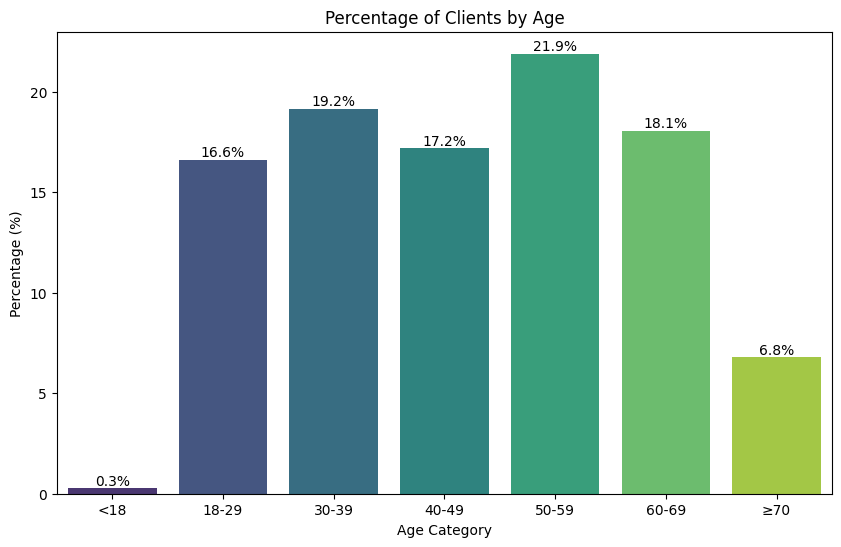

In [37]:
# Define the order of age categories
age_order = ['<18', '18-29', '30-39', '40-49', '50-59', '60-69', '≥70']

# Reindex to ensure the correct order
age_percentage_ordered = age_counts.reindex(age_order).fillna(0)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=age_percentage_ordered.index, y=age_percentage_ordered.values, palette='viridis')

# Add titles and labels
plt.title('Percentage of Clients by Age')
plt.xlabel('Age Category')
plt.ylabel('Percentage (%)')

# Add percentage labels on top of each bar
for index, value in enumerate(age_percentage_ordered.values):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [38]:
age_no_duplicates["clnt_tenure_yr"].unique()

array([ 6.,  7.,  5., 16., 12., 30., 15.,  8.,  4.,  3., 10., 11., 13.,
       14., 19., 18., 25., 23., 21., 17.,  9., 27., 24., 20., 28., 22.,
       29., 46., 26., 32., 33., 35.,  2., 38., 31., 48., 34., 36., 51.,
       47., 49., 37., 39., 40., 55., 42., 44., 43., 50., 54., 41., 45.,
       52.])

In [39]:
age_no_duplicates["clnt_tenure_yr"].describe()

count    50500.000000
mean        12.032238
std          6.860131
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         55.000000
Name: clnt_tenure_yr, dtype: float64

In [40]:
def categorize_yr(year):
    if year <= 5:
        return '0-5'
    elif 5 <= year < 15:
        return '5-15'
    elif 15 <= year < 25:
        return '15-25'
    elif 25 <= year < 35:
        return '25-35'
    elif 35 <= year < 45:
        return '35-45'
    elif year >= 45:
        return '45-55'

In [41]:
age_no_duplicates['year_category'] = age_no_duplicates['clnt_tenure_yr'].apply(categorize_yr)


/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_13270/2239833442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_no_duplicates['year_category'] = age_no_duplicates['clnt_tenure_yr'].apply(categorize_yr)


/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_13270/1483648961.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_percentage_ordered.index, y=year_percentage_ordered.values, palette='viridis')


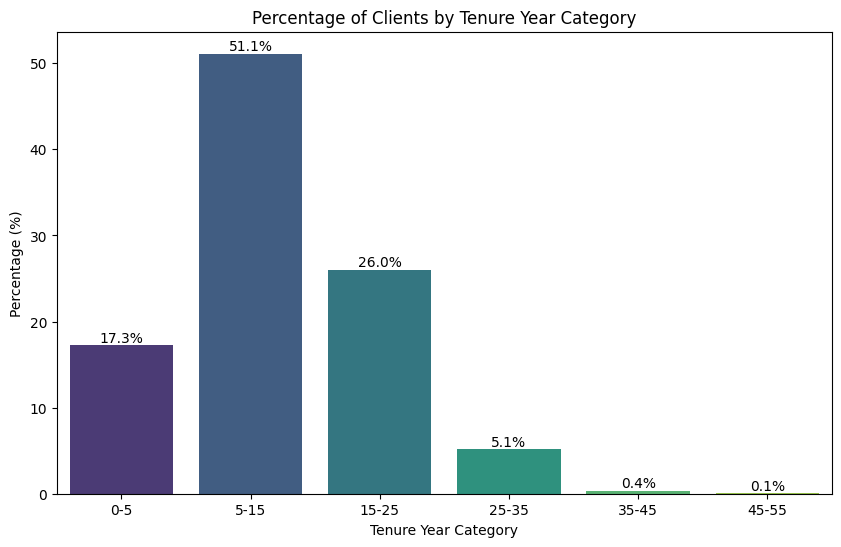

In [42]:
# Calculate the percentage for each year category
year_percentage = age_no_duplicates['year_category'].value_counts(normalize=True) * 100

# Define the order of year categories
year_order = ['0-5', '5-15', '15-25', '25-35', '35-45', '45-55']

# Reindex to ensure the correct order
year_percentage_ordered = year_percentage.reindex(year_order).fillna(0)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=year_percentage_ordered.index, y=year_percentage_ordered.values, palette='viridis')

# Add titles and labels
plt.title('Percentage of Clients by Tenure Year Category')
plt.xlabel('Tenure Year Category')
plt.ylabel('Percentage (%)')

# Add percentage labels on top of each bar
for index, value in enumerate(year_percentage_ordered.values):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

# Show the plot
plt.show()








In [43]:
# I want to know the frequency with which the client logged onto Vanguard’s platform over the last six months.
age_no_duplicates["logons_6_mnth"].unique()

array([9., 6., 3., 5., 4., 8., 7.])

In [134]:
test_data_1 = result_2[result_2['Variation'] == 'Test']
control_data_1= result_2[result_2['Variation'] == 'Control']

In [135]:
test_data_1['date_time'] = pd.to_datetime(test_data['date_time'])
test_data_1['date'] = pd.to_datetime(test_data['date_time']).dt.date
test_data_1['time'] = pd.to_datetime(test_data['date_time']).dt.time

/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_13270/618953351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_1['date_time'] = pd.to_datetime(test_data['date_time'])
/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_13270/618953351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_1['date'] = pd.to_datetime(test_data['date_time']).dt.date
/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_13270/618953351.py:3: SettingWithCopyWarning: 
A value is trying

In [136]:
test_data_1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,date,time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,2017-04-02,11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,2017-04-02,11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,2017-04-02,11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,2017-04-02,11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,2017-04-02,11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15,2017-03-30,23:59:15
321305,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51,2017-03-30,23:58:51
321306,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40,2017-03-30,23:58:40
321307,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11,2017-03-30,23:55:11


In [47]:
troll_4 = test_data.copy()

In [48]:
troll_5 = test_data.copy()

In [138]:
# create a new column for process_step with numbers instead of words
name_to_value = {
    "start": "1",
    "step_1": "2",
    "step_2": "3",
    "step_3": "4",
    "confirm": "5"

}

test_data_1['process_step_n'] = test_data_1['process_step'].map(name_to_value)


/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_13270/1880233846.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_1['process_step_n'] = test_data_1['process_step'].map(name_to_value)


In [139]:
#sorted the data by descending order

test_data_1.sort_values(by=['client_id',"visit_id", 'process_step_n','date_time'], ascending=False, inplace=True)


/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_13270/2788566555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_1.sort_values(by=['client_id',"visit_id", 'process_step_n','date_time'], ascending=False, inplace=True)


In [140]:
filtered_data_confirm = test_data_1[test_data_1['process_step_n'] == "5"]


In [52]:
confirm_test_data = filtered_data_confirm.groupby('client_id').first()[["visit_id", 'date_time']]
# Reset index to make 'client_id' a column again
confirm_test_data = confirm_test_data.reset_index()

In [141]:
confirm_test_data

,client_id,visit_id,date_time
0,555,637149525_38041617439_716659,2017-04-15 13:00:34
1,647,40369564_40101682850_311847,2017-04-12 15:47:45
2,1336,614001770_19101025926_112779,2017-05-08 08:23:00
3,1516,255400977_38039535960_779641,2017-04-06 22:30:18
4,1643,753205700_16851596206_134483,2017-06-10 08:00:55
...,...,...,...
18682,9998851,310744937_17135608286_213964,2017-04-05 12:08:43
18683,9998964,699981922_52880598802_858635,2017-04-05 23:50:02
18684,9999009,149965839_24823291142_245569,2017-03-31 07:20:36
18685,9999400,288904166_90826265353_276104,2017-04-20 05:23:27


In [66]:
confirm_test_data[confirm_test_data["visit_id"] == "529752029_36889679952_99185"]

,client_id,visit_id,date_time
8253,4436159,529752029_36889679952_99185,2017-04-19 23:10:00
17781,9501838,529752029_36889679952_99185,2017-04-19 23:15:59


In [142]:
test_data[test_data["client_id"] == 1643]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,date,time,process_step_n,first
171300,1643,19.0,229.0,55.0,M,2.0,81731.39,0.0,3.0,Test,121807985_20524560478,753205700_16851596206_134483,confirm,2017-06-10 08:00:55,2017-06-10,08:00:55,5,1970-01-01
171301,1643,19.0,229.0,55.0,M,2.0,81731.39,0.0,3.0,Test,121807985_20524560478,753205700_16851596206_134483,step_3,2017-06-10 08:00:25,2017-06-10,08:00:25,4,1970-01-01
171302,1643,19.0,229.0,55.0,M,2.0,81731.39,0.0,3.0,Test,121807985_20524560478,753205700_16851596206_134483,step_2,2017-06-10 07:50:43,2017-06-10,07:50:43,3,1970-01-01
171303,1643,19.0,229.0,55.0,M,2.0,81731.39,0.0,3.0,Test,121807985_20524560478,753205700_16851596206_134483,step_1,2017-06-10 07:50:27,2017-06-10,07:50:27,2,1970-01-01
171304,1643,19.0,229.0,55.0,M,2.0,81731.39,0.0,3.0,Test,121807985_20524560478,753205700_16851596206_134483,start,2017-06-10 07:49:27,2017-06-10,07:49:27,1,1970-01-01
171298,1643,19.0,229.0,55.0,M,2.0,81731.39,0.0,3.0,Test,910842861_51062379179,633860590_96880450633_976109,step_1,2017-04-24 06:36:32,2017-04-24,06:36:32,2,1970-01-01
171296,1643,19.0,229.0,55.0,M,2.0,81731.39,0.0,3.0,Test,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:38:20,2017-04-24,06:38:20,1,1970-01-01
171297,1643,19.0,229.0,55.0,M,2.0,81731.39,0.0,3.0,Test,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:37:17,2017-04-24,06:37:17,1,1970-01-01
171299,1643,19.0,229.0,55.0,M,2.0,81731.39,0.0,3.0,Test,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:36:07,2017-04-24,06:36:07,1,1970-01-01
171295,1643,19.0,229.0,55.0,M,2.0,81731.39,0.0,3.0,Test,910842861_51062379179,379946188_1773022140_107963,start,2017-04-15 15:06:00,2017-04-15,15:06:00,1,1970-01-01


In [158]:
test_data_1[['

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

In [143]:
filtered_data_start = test_data[test_data['process_step_n'] == "1"]
start_test_data = filtered_data_start.groupby('client_id').first()[["visit_id", 'date_time']]
# Reset index to make 'client_id' a column again
start_test_data = start_test_data.reset_index()



In [145]:
start_test_data

,client_id,visit_id,date_time
0,555,637149525_38041617439_716659,2017-04-15 12:57:56
1,647,40369564_40101682850_311847,2017-04-12 15:41:28
2,934,7076463_57954418406_971348,2017-04-18 02:38:52
3,1336,583743392_96265099036_939815,2017-05-08 06:05:12
4,1346,27144337_83739845380_214282,2017-06-06 18:28:40
...,...,...,...
26674,9999150,982803842_91891255980_123078,2017-05-29 16:55:30
26675,9999400,288904166_90826265353_276104,2017-04-20 05:21:28
26676,9999626,182723364_27031318473_880901,2017-05-14 09:07:51
26677,9999729,99583652_41711450505_426179,2017-04-05 13:40:49


In [146]:
testing = start_test_data.copy()

In [144]:
filtered_data_step_1 = test_data[test_data['process_step_n'] == "2"]
step_1_test_data = filtered_data_step1.groupby('client_id').first()[["visit_id", 'date_time']]
# Reset index to make 'client_id' a column again
step_1_test_data = step_1_test_data.reset_index()

step_1_test_data

,client_id,visit_id,date_time
0,555,637149525_38041617439_716659,2017-04-15 12:58:03
1,647,40369564_40101682850_311847,2017-04-12 15:41:35
2,1336,583743392_96265099036_939815,2017-05-08 06:05:37
3,1346,27144337_83739845380_214282,2017-06-06 18:23:54
4,1516,481123290_95510977345_707323,2017-04-05 15:57:36
...,...,...,...
24262,9999150,982803842_91891255980_123078,2017-05-29 16:55:18
24263,9999400,288904166_90826265353_276104,2017-04-20 05:21:50
24264,9999626,182723364_27031318473_880901,2017-05-14 09:07:59
24265,9999729,99583652_41711450505_426179,2017-04-05 13:41:04


In [ ]:
f

In [ ]:
first_row_per_visitor = filtered_data.groupby('visitor_id').first()[['date_time']]


In [ ]:
first_row_per_visitor

In [ ]:
filtered_date.iloc[0]

In [ ]:
#filtered_date_df = filtered_date.to_frame()
#filtered_date_df
filtered_date["visitor_id"].nunique()

In [ ]:
troll_4.sort_values(by=['client_id',"visit_id", 'process_step_n','date_time'], ascending=False, inplace=True)



In [ ]:
df_step_5.drop_duplicates(subset='client_id', "process_step_n", keep='first')

In [ ]:
troll_4.drop_duplicates(subset=['client_id', 'process_step_n'], keep='first')


In [ ]:
troll_4["process_step_n"].value_counts()

In [ ]:
def filter_first_step_5_per_client(troll_4):
    # Filter rows where 'process_step_n' is 5
    df_step_5 = troll_4[troll_4['process_step_n'] == "5"]
    
    # Drop duplicates, keeping only the first occurrence for each 'client_id'
    df_first_step_5_per_client = df_step_5.drop_duplicates(subset='client_id', keep='first')
    
    return df_first_step_5_per_client

# Example usage:
# Assuming troll_4 is your DataFrame
filtered_df = filter_first_step_5_per_client(troll_4)


In [ ]:
troll_4.head(20)

In [ ]:
import pandas as pd

def client_process_steps(troll_4):
    # Create a multi-index DataFrame to include both 'date_time' and 'visitor_id'
    troll_4['date_time'] = pd.to_datetime(troll_4['date_time'])
    troll_4_pivot = troll_4.pivot_table(
        index='client_id', 
        columns='process_step_n', 
        values=['date_time', 'visitor_id'], 
        aggfunc='first'
    )

    # Flatten the multi-index columns
    troll_4_pivot.columns = [f'{col[0]}_step_{col[1]}' for col in troll_4_pivot.columns]

    # Reset index to have 'client_id' as a column
    troll_4_pivot.reset_index(inplace=True)

    return troll_4_pivot

# Example usage:
# Assuming your DataFrame is named 'troll_4'
result = client_process_steps(troll_4)
display(result)


In [ ]:
result

In [98]:
#create a function

client = troll[troll["visitor_id"] == "966387613_75892747742"]
display(client)
last_time = pd.to_datetime(client[client['process_step']=='confirm'].iloc[0,-3])
first_time = pd.to_datetime(clientlient['process_step']=='confirm'].iloc[-1,-3])

delta_total = last_time - first_time
print(f"This user took {round(delta.total_seconds()/60,2)} seconds to complete the whole process")

NameError: name 'troll' is not defined

In [ ]:
#control_data

In [ ]:
test_data.columns = test_data.columns.str.lower()
control_data.columns = control_data.columns.str.lower()

In [ ]:
test_data.isnull().sum()

In [ ]:
test_data.sort_values(["client_id", "visitor_id", "process_step", "date_time" ], ascending=True)

In [ ]:
control_data.sort_values(["client_id", "visitor_id", "process_step", "date_time" ], ascending=True)